In [ ]:
import cv2
!pip install pygame pillow
!pip install opencv-python tensorflow keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

To download and check the dataset use these links

In [ ]:
data = 'https://drive.google.com/file/d/1LMS2sS9Ik2A1XTSmVjTk8F7t4qAhsIU4/view?usp=drive_link'
train_dir = "https://drive.google.com/drive/folders/1wXpvlanrfe9gaG776x_gAxuSogzNyevj?usp=sharing"
test_dir = "https://drive.google.com/drive/folders/1qiuj-cdFltT3bxZIImYw7sgc4--OMRg1?usp=sharing"

In [ ]:
train_dir = "/content/drive/MyDrive/data/train" # Directory containing the training data
test_dir = "/content/drive/MyDrive/data/test"  # Directory containing the validation data

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "validation"
)

Found 22970 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Defining the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 2.7651 - accuracy: 0.1876 
Epoch 1: val_accuracy improved from -inf to 0.24511, saving model to model_weights.h5
359/359 [==============================] - 4382s 12s/step - loss: 2.7651 - accuracy: 0.1876 - val_loss: 1.9681 - val_accuracy: 0.2451
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 2.4052 - accuracy: 0.2267
Epoch 2: val_accuracy improved from 0.24511 to 0.34358, saving model to model_weights.h5
359/359 [==============================] - 88s 244ms/step - loss: 2.4052 - accuracy: 0.2267 - val_loss: 1.7113 - val_accuracy: 0.3436
Epoch 3/50
359/359 [==============================] - ETA: 0s - loss: 2.1900 - accuracy: 0.2646
Epoch 3: val_accuracy improved from 0.34358 to 0.36453, saving model to model_weights.h5
359/359 [==============================] - 87s 242ms/step - loss: 2.1900 - accuracy: 0.2646 - val_loss: 1.6786 - val_accuracy: 0.3645
Epoch 4/50
359/359 [=========================

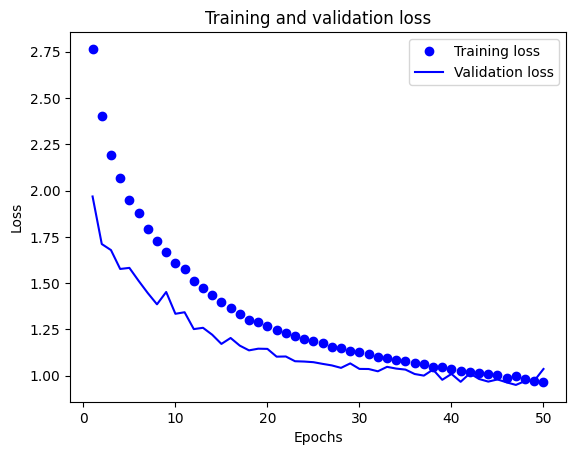

In [ ]:
import matplotlib.pyplot as plt

# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

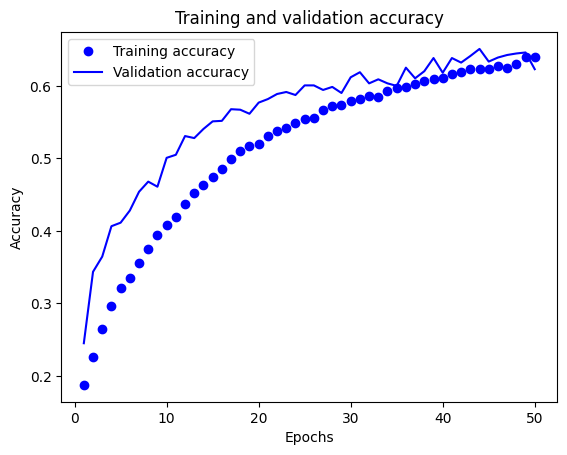

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 4s 156ms/step


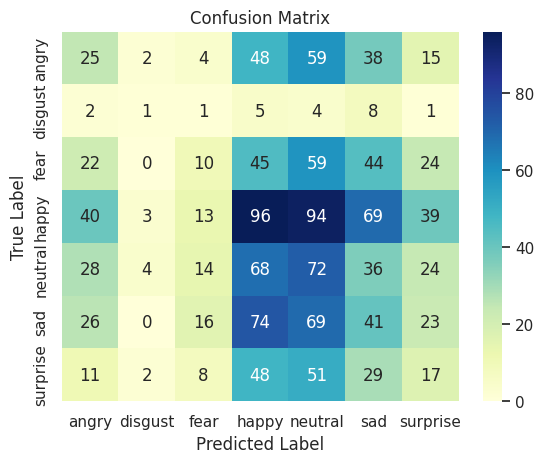

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Now, Let's use model_weights.h5 from above to capture emotions from our live feed. (**Please provide access to webcam when asked**)

In [36]:
from keras.models import load_model

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

model.load_weights('/content/model_weights.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture()
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()